In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from polygraphs.analysis import Processor




The below function gives the hard-coded locations of all the simulation outputs, organised by random number generator seed.
The outputs are stored in Polygraphs Processor instances, which contain configuration data and a list of Pandas DataFrames ('beliefs') each item of which contains the output data of one trial of a simulation.

There are also two simulations (with seed 917012) using randomly selected mis/disinformants, with the following locations:

    procpath = str(Path.cwd() / "polygraphs-cache/")
    Rnd_Misinfo = Processor(procpath + "6ff2e79bc1f2400c8584555971eb386c")
    Rnd_Disinfo = Processor(procpath + "783bdd1d2bd446bcbe10b911225c0d3b")

In [178]:
from pathlib import Path

def read_sims(seed = 917012): 
# Returns a hard-coded list of Polygraphs Processors.

	procpath = str(Path.cwd() / "polygraphs-cache/")
	if seed == 30525:
		BG_Baseline = Processor(procpath + "48b51452a73249b1bbdbd391f859a8e6")

		Out_Misinfo = Processor(procpath + "/5e4b6c5e4cc44f39a516e8169f4b3b1f")
		Out_Disinfo = Processor(procpath + "/ccd58c4656874ade8e72480fe0134cdc")

		WtC_Misinfo = Processor(procpath + "/19eb3766ab164aeda7554e6b74f8e056")
		WtC_Disinfo = Processor(procpath + "/d40dc9302b8b4e528c4a6d0ae1ccd682")

		PR_Misinfo = Processor(procpath + "/d985847ab6504130ae73d8e0298dc6dd")
		PR_Disinfo = Processor(procpath + "/ab76377d8c8649edab947070fbce4be9")

	elif seed == 917012:
		BG_Baseline = Processor(procpath + "/d2f7b536d2de400da29096855872b944")

		Out_Misinfo = Processor(procpath + "/98e33747c96c42edbf14a2abf8bad9c1")
		Out_Disinfo = Processor(procpath + "/c6a231987929429ab5325090a5a5fd28")

		WtC_Misinfo = Processor(procpath + "/7f4ab3afe2db4625a7baed146c2f94b0")
		WtC_Disinfo = Processor(procpath + "/93e141c5cf254692bcc2428a32ae0590")

		PR_Misinfo = Processor(procpath + "/c556073676e3452bbf1b9066534e5caa")
		PR_Disinfo = Processor(procpath + "/bf4b6d352e90425a86af0f997fabfd0a")

	elif seed == 122216:
		BG_Baseline = Processor(procpath + "/c3f3ce10143141929b2bab13911392a8")

		Out_Misinfo = Processor(procpath + "/d7669be65b2b498f989066d9d7494896")
		Out_Disinfo = Processor(procpath + "/3a9e9221a3f547c486397bcb0ab424f8")

		WtC_Misinfo = Processor(procpath + "/aa0dbabcd97447f3a11df41d910c5c94")
		WtC_Disinfo = Processor(procpath + "/958eee027bc84fce99b7bc2be33c56c6")

		PR_Misinfo = Processor(procpath + "/942f5225afb54457af17d52d186093e3")
		PR_Disinfo = Processor(procpath + "/852ce55ec6524230abb75af53c23886c")

	else: raise ValueError('Seed must be an integer equal to one of the hard-coded values')

	procs = [BG_Baseline, Out_Misinfo, Out_Disinfo, WtC_Misinfo, WtC_Disinfo, PR_Misinfo, PR_Disinfo]
	
	return procs


The cell below uses linked lists to organise the data:
on the first level there are seven items, namely the output of _read\_sims()_ (for processors) and _S\_names_ (for human-readable identifiers),
and on the second level there are three items, _S\_seeds_ for the three different RNG seeds used.
The processors that store the output of the simulations are collected in the list of lists _procs_.

In [179]:
S_seeds = [30525, 122216, 917012]
S_names = ["No Mis/Disinformants", "Out-D Misinformants", "Out-D Disinformants", "WtC Misinformants", "WtC Disinformants", "PageRank Misinformants", "PageRank Disinformants"]
procs = [ [] for _ in range(len(S_names))] # store links to the processors containing the simulation data, 3 different seeds for 7 different configs
raw_sims = []	# a linked list of the raw output of the simulations
avg_sims = []	# a linked list of the output of the simulations averaged across the 3 seeds and the 10 trials per run.

for seed in S_seeds:
	for j, proc in enumerate(read_sims(seed)):
		procs[j].append(proc)


The cell below reads the simulation data from the lists of processors in _procs_, and stores the raw output in _raw\_sims_ and the averages across all the trials in _avg\_sims_.
These are lists (_raw\_sims_ is a list of lists) where each item is a Dataframe, and they are linked lists with _procs_, _S\_names_, etc., 
They can easily be combined into a single DataFrame, but since it is best practice to collect DataFrames in a list first anyway before sending it to _pd.concat()_, I just worked with the lists directly since I find it convenient.

In [156]:
for i, op in enumerate(procs):											# collects the 30 trials (10 * trials for 3 * seeds)
	#print("Config", i+1, "/", len(procs))
	df_list = []
	for run in op:
		#print(len(run.sims))
		for b in run.beliefs:
			bdf = b.rename(columns={"beliefs" : S_names[i]})						
			df_list.append(bdf)
	raw_sims.append(df_list)												# stores the unmodified data of all the simulations
	avg_sims.append(pd.concat(df_list).groupby("iteration").mean())			# concatenates and averages the 30 different trials for each configuration of the simulation


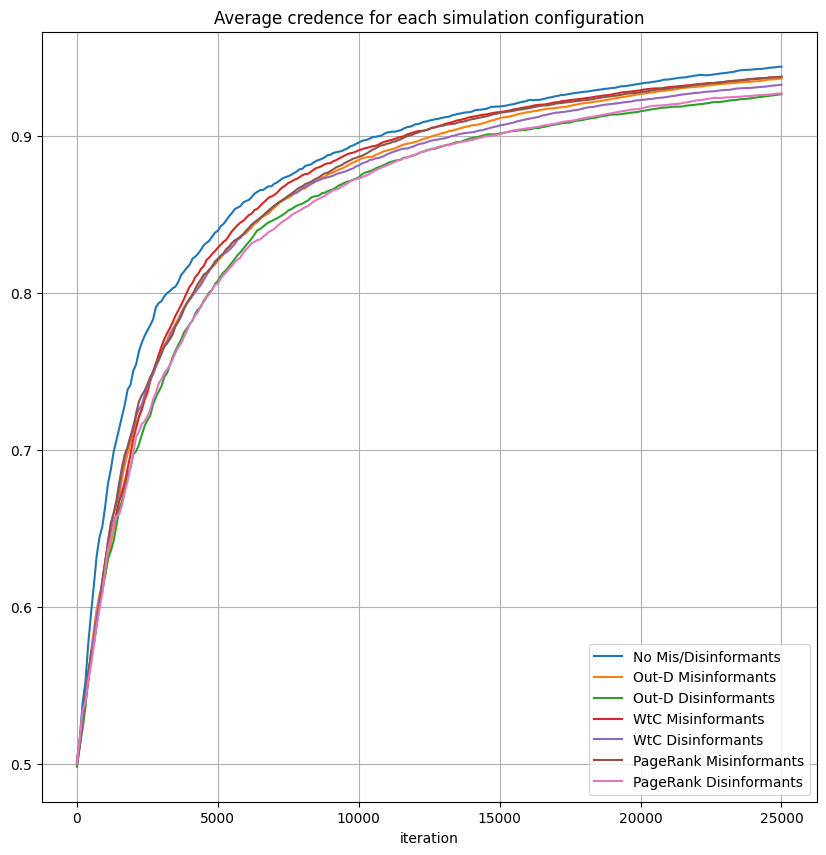

In [157]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

avg_sims[0].plot(ax=ax, title="Average credence for each simulation configuration") 

for i in range(1, len(avg_sims)):
	avg_sims[i].plot(ax=ax)

ax.grid(visible=True)


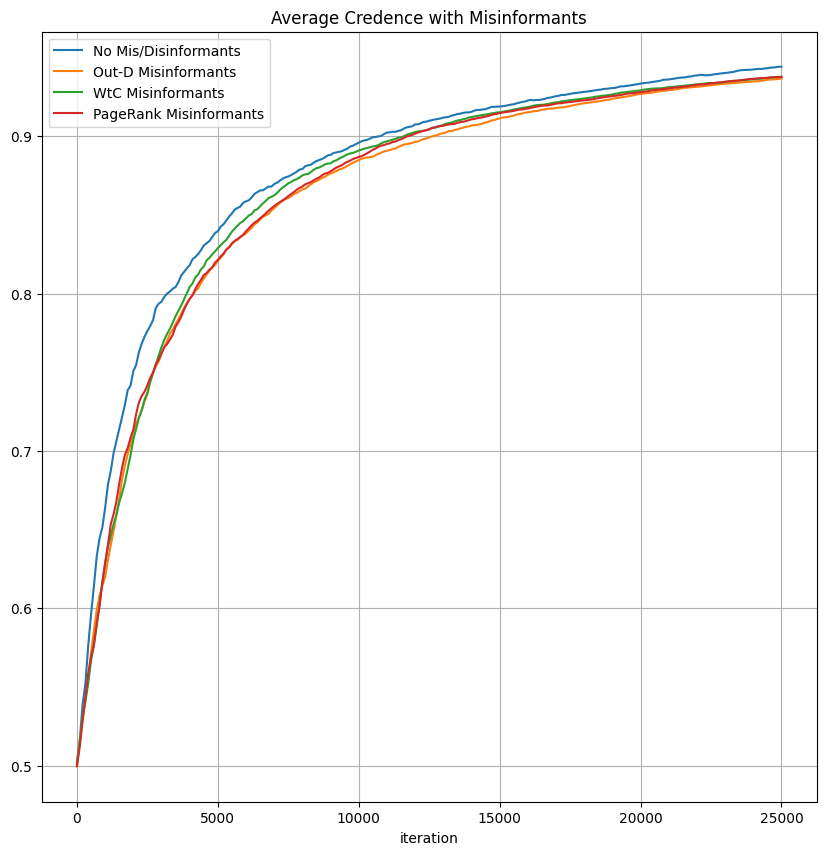

In [158]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

avg_sims[0].plot(ax=ax, title="Average Credence with Misinformants") 

for i in range(1, len(avg_sims)):
	if 'Misinformants' in S_names[i]:
		avg_sims[i].plot(ax=ax)

ax.grid(visible=True)

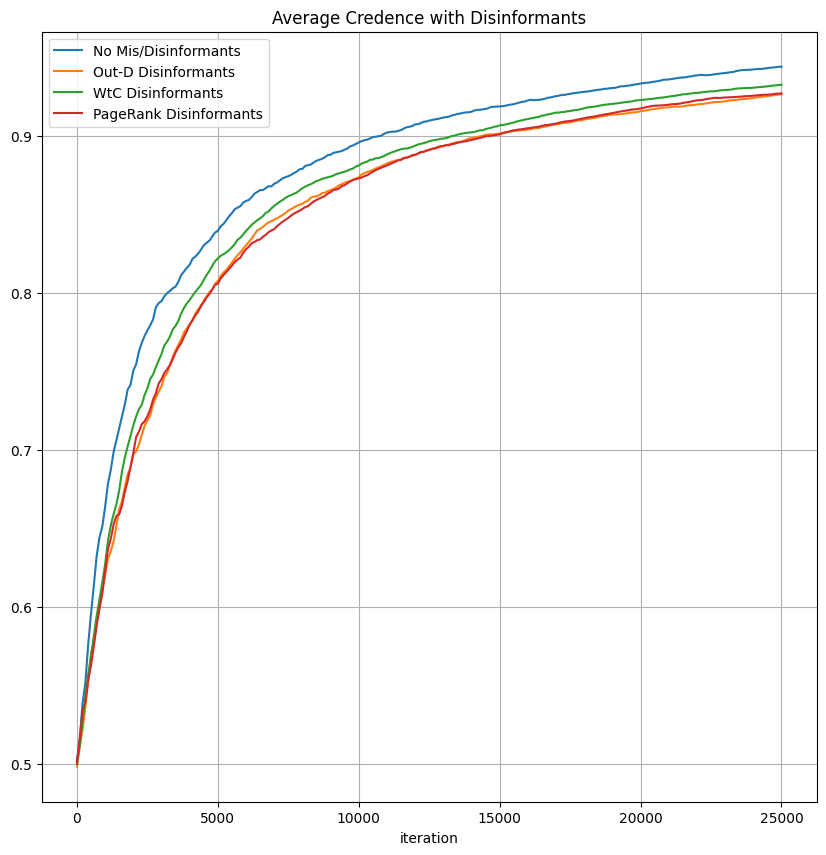

In [169]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

avg_sims[0].plot(ax=ax, title="Average Credence with Disinformants") 

for i in range(1, len(avg_sims)):
	if 'Disinformants' in S_names[i]:
		avg_sims[i].plot(ax=ax)

ax.grid(visible=True)

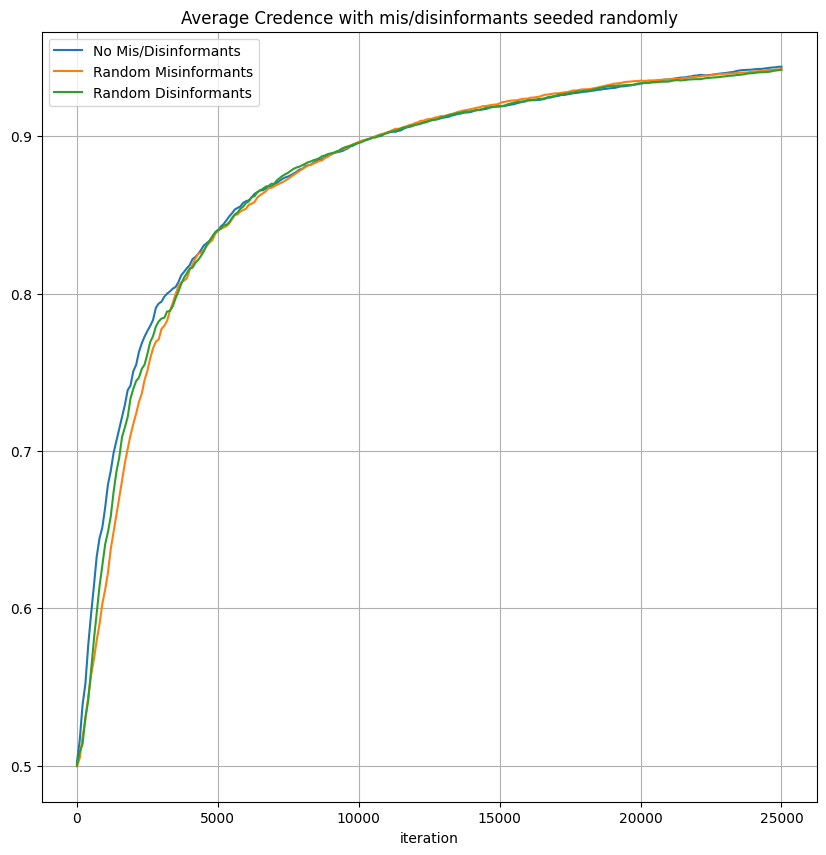

In [170]:
procpath = str(Path.cwd() / "polygraphs-cache/")
Rnd_Misinfo = Processor(procpath + "/6ff2e79bc1f2400c8584555971eb386c")
Rnd_Disinfo = Processor(procpath + "/783bdd1d2bd446bcbe10b911225c0d3b")

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

avg_sims[0].plot(ax=ax, title="Average Credence with mis/disinformants seeded randomly")
pd.concat(Rnd_Misinfo.beliefs).rename(columns={"beliefs" : "Random Misinformants"}).groupby("iteration").mean().plot(ax=ax)
pd.concat(Rnd_Disinfo.beliefs).rename(columns={"beliefs" : "Random Disinformants"}).groupby("iteration").mean().plot(ax=ax)

ax.grid(visible=True)
ax.legend()

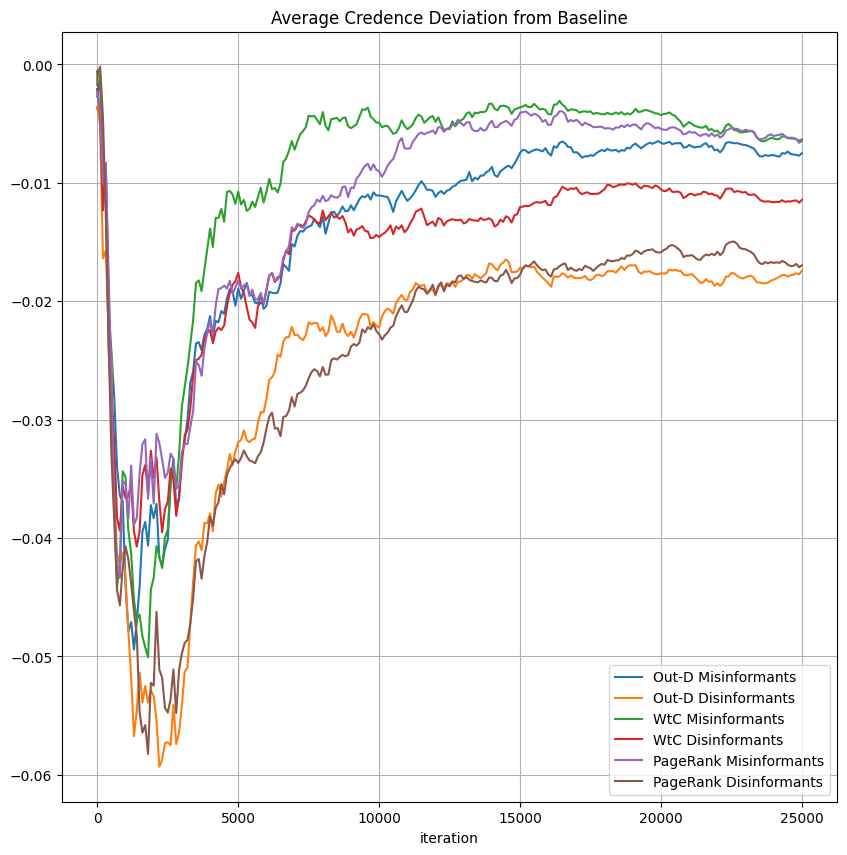

In [171]:

fig, ax = plt.subplots(1,1)
ax.set_title("Average Credence Deviation from Baseline")
fig.set_size_inches(10,10)


for i in range(1, len(avg_sims)):
	avg_sims[i].squeeze().sub(avg_sims[0].squeeze()).plot(ax=ax, label = S_names[i])
ax.legend()
ax.grid(visible=True)


For the inward measures, we first load the Dataframe containing the network centrality measures for all of the nodes. We generated these before doing the simulations.

In [172]:
import json

df = pd.read_json('centrality.json', orient='columns')
df.set_index('gml_id', inplace=True)

print(df.head())
print(df.index.name)

        outd  ind        pr   S   St  H  Ht  S_cluster
gml_id                                                
0         41   32  0.001275  12   15  3   3          1
1          1   51  0.009412  15    0  3   0          1
2         84   77  0.002095  15   20  3   4          1
3         56   62  0.001723  10   15  3   3          1
4         89   74  0.002436  30  105  3   6          0
gml_id


For the following graphs we only look at one configuration of the simulation, by default PR_Disinfo with seed 30525.
That greatly simplifies the data manipulation.
The results are very similar across all configurations, so I chose one where the effect on the performance of the network was the largest.
But again, even if we look at the baseline case the results are so close as to make no difference.
The difference is that between the different configurations, the slope of the lines are slightly less steep the worse-performing the network is under that configuration.
The below does some manipulation on the dataframe of results to make graphing easier.

The below remaps the output of a simulation to the original node ids, since pytorch generates new labels for the network it simulates.
Thankfully, Polygraphs stores the original ids of each node among the simulation data.

In [173]:
import torch

def trial_generator(proc):
	for i, b in enumerate(proc.beliefs):
		yield pd.concat([b], keys=[i], names=['trial'])

def map_to_gml(proc):
	# Maps the beliefs-over-iteration from a polygraphs Processor onto the original node labels ('gml_id'), returned as DataFrame 'dynamic'.
	# Lifts out a mapping of the node labels used by DGL/PyTorch ('nodes' in the Processor, renamed to 'tensor_id') onto the new labels, returned as DataFrame 'static'.
	# Polygraphs stores the original id for each node in the graph.pg['ndata']['gml_id'] field of the processor; this function retrieves that id and re-indexes the simulation data accordingly.
	# The dynamic data (what changes in each iteration of the simulation) is seperated from the static (constant across iterations) for memory management reasons.
	# NOTE: The resulting combined DataFrame has multiple columns named 'belief'; one for each trial in the simulation.
	# The name was kept the same across trials to avoid difficulties with processing all of the beliefs

	trials = list(trial_generator(proc))
	dynamic = pd.concat(trials)

	dynamic = dynamic.join(pd.Series(proc.graphs[0].pg['ndata']['gml_id'].numpy(), name='gml_id' ), on='node')

	# Changes the index to 'gml_id' once all the dynamic data has been added
	
	dynamic = dynamic.reset_index()
	dynamic = dynamic.set_index(['gml_id', 'trial', 'iteration'])
	static = dynamic.pop('node').groupby(level='gml_id').first()
	static.name = 'tensor_id'

	return dynamic.sort_index(), static.sort_index()


In [174]:
config = 6 # which config to run the below graphs on, referring to the order of S_list and S_names

results, nodemap = map_to_gml(procs[config][0])	


First we graph the average credence by cluster.

" plt.savefig(S_names[config]+'_avg_belief_by_cluster.png')\nplt.close() "

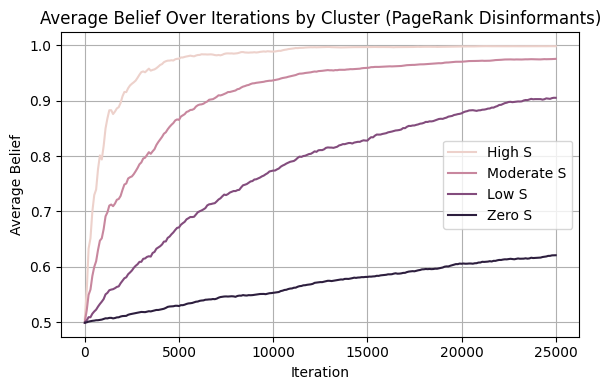

In [175]:
import seaborn as sns

# Merge with cluster information
df_merged = pd.merge(results.reset_index(), df[['S_cluster']], on='gml_id', how='left')

# Group by cluster and compute average belief
avg_belief_by_cluster = df_merged.groupby('S_cluster')['beliefs'].mean()

# Define custom labels for clusters
cluster_labels = {
    0: 'High S',
	1: 'Moderate S',
    2: 'Low S',
    3: 'Zero S',
}

# --- Line Plot of Average Belief Over Iterations ---
df_avg_iter = df_merged.groupby(['iteration', 'S_cluster'])['beliefs'].mean().reset_index()

plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=df_avg_iter, x='iteration', y='beliefs', hue='S_cluster')

# Customize legend with descriptive labels
handles, labels = ax.get_legend_handles_labels()
new_labels = [cluster_labels.get(int(label), label) for label in labels]
ax.legend(handles=handles, labels=new_labels)

ax.set_title(f'Average Belief Over Iterations by Cluster ({S_names[config]})')
ax.set_xlabel('Iteration')
ax.set_ylabel('Average Belief')
ax.grid(visible=True)
plt.tight_layout()

# Uncomment below lines to save plot to file rather than show in notebook
""" plt.savefig(S_names[config]+'_avg_belief_by_cluster.png')
plt.close() """



We look at the distribution of the other inward measures (in-degree and PageRank) in the clusters by S-score.

/tmp/ipykernel_1172/1672054138.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([cluster_labels.get(label, label) for label in ax.get_xticks()])
/tmp/ipykernel_1172/1672054138.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([cluster_labels.get(label, label) for label in ax.get_xticks()])


" plt.savefig('violin_plot_pr_by_cluster.png')\nplt.close() "

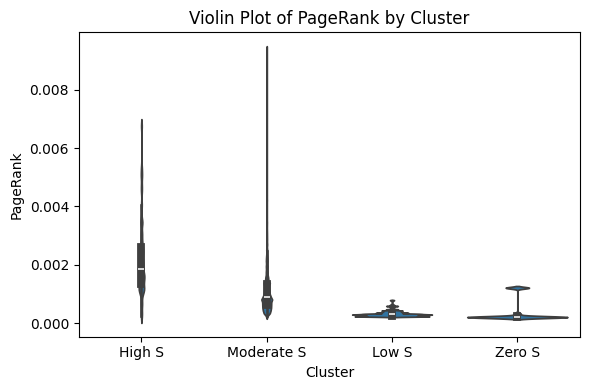

In [176]:
df_merged = pd.merge(results.reset_index(), df[['S', 'S_cluster', 'ind', 'outd', 'pr']], on='gml_id', how='left') # re-generate df_merged to include more info

# --- Violin Plot ---
plt.figure(figsize=(6, 4))
ax = sns.violinplot(x='S_cluster', y='ind', data=df_merged)
ax.set_xticklabels([cluster_labels.get(label, label) for label in ax.get_xticks()])
ax.set_title('Violin Plot of in-degrees by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('In-Degree')
plt.tight_layout()
plt.savefig('violin_plot_indegrees_by_cluster.png')
plt.close()

# --- Violin Plot ---
plt.figure(figsize=(6, 4))
ax = sns.violinplot(x='S_cluster', y='pr', data=df_merged)
ax.set_xticklabels([cluster_labels.get(label, label) for label in ax.get_xticks()])
ax.set_title('Violin Plot of PageRank by Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('PageRank')
plt.tight_layout()

# Uncomment below lines to save plot to file rather than show in notebook
""" plt.savefig('violin_plot_pr_by_cluster.png')
plt.close() """

Generate violin plots describing the distribution of credences at every 5000 iterations for each cluster of nodes by S-score (cluster number is hard-coded at 0-3).

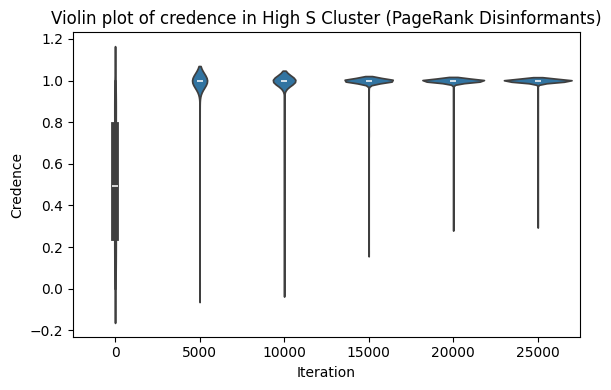

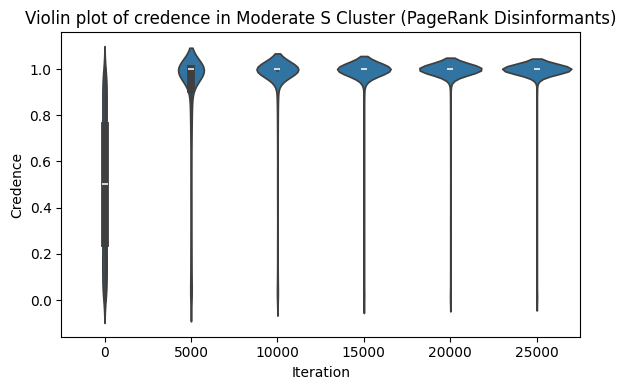

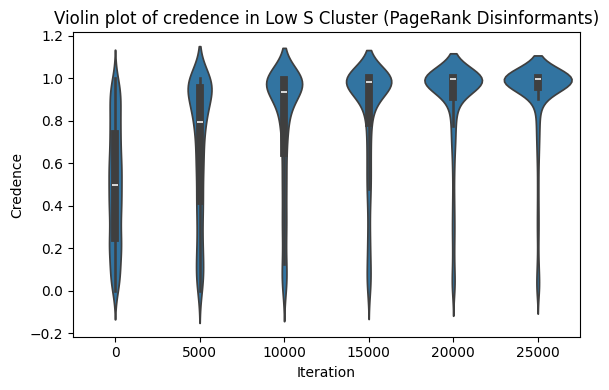

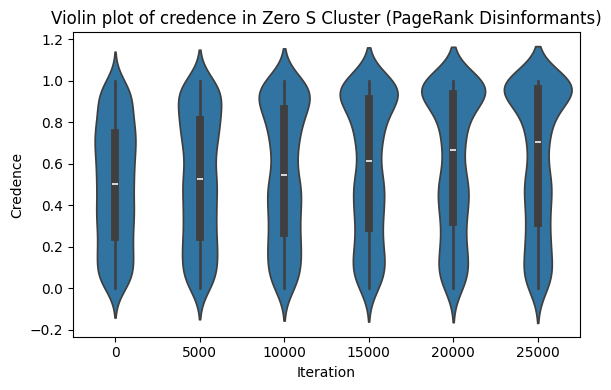

In [177]:
# For each cluster from 0 to 3
for c in range(4):
    # Filter and plot for each iteration
    filtered_df = df_merged[(df_merged['iteration'] % 5000 == 0) & (df_merged['S_cluster'] == c)]

    plt.figure(figsize=(6, 4))
    ax = sns.violinplot(x='iteration', y='beliefs', data=filtered_df)

    ax.set_title(f'Violin plot of credence in {cluster_labels[c]} Cluster ({S_names[config]})')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Credence')

    plt.tight_layout()
   
    # Uncomment below lines to save plot to file rather than show in notebook
    """ plt.savefig(f'{S_names[config]}beliefs_violin_Scluster{c}_over_iterations.png')
    plt.close() """